# **Reconstructing $F_E(x)$ from the Zeros of the Riemann Zeta Function**

## **Objective**
This experiment demonstrates that the function $F_E(x)$ can be reconstructed **exclusively from the nontrivial zeros of the Riemann zeta function**. Successful reconstruction requires a **precise alignment** between the zeros and the values of $x$, and the accuracy depends **directly** on the number of zeros used.

The results show that:
- **If the number of zeros is insufficient**, the reconstruction exhibits **distortions**.
- **If the zeros are misaligned with $x$**, the reconstruction **deteriorates rapidly**.
- **When the zeros are properly aligned and sufficiently numerous**, the reconstruction **reproduces $F_E(x)$ with virtually zero absolute error**.

---

## **Methodology**
The experiment follows these steps:

1. **Selection of the $x$ interval**  
   We arbitrarily choose **$5000000 \leq x \leq 5001000$** for analysis.

2. **Alignment of Riemann zeros with $x$**  
   - For each $x$ value, we associate a **corresponding zero**, ensuring that $x$ and $\gamma_n$ are **perfectly aligned**.
   - **We do not use the first zeros**, but rather those that **precisely correspond** to the points in the $x$ interval.
   - This alignment is **essential** for accurate reconstruction.

3. **Construction of the Cosine Matrix**  
   We define the matrix:
   $$
   C_{ij} = \cos(\gamma_i \log x_j)
   $$

4. **Spectral Projection via SVD**  
   We apply **Singular Value Decomposition (SVD)** to find the projection coefficients:
   $$
   A_{\gamma} = V^T S^{-1} U^T F_E
   $$
   SVD is used **for didactic convenience** to emphasize:
   - **The reconstruction accuracy depends on the number of zeros used**.
   - **The alignment of the zeros with $x$ is critical**.
   - The system could be solved in other ways, but SVD helps illustrate the need for spectral projection.

5. **Reconstruction of $F_E(x)$**  
   The function is reconstructed by the expansion:
   $$
   F_E^{\text{rec}}(x) = \sum_{n} A_{\gamma_n} \cos(\gamma_n \log x)
   $$

6. **Computation of Mean Absolute Error (MAE)**  
   We evaluate the reconstruction accuracy by comparing it to the actual values of $F_E(x)$.

---

## **Tests with Varying Numbers of Zeros**
To understand the impact of the number of zeros, we perform **three reconstructions** in the interval $x \in [5000000, 5001000]$:

1. **1000 zeros** → Same number of $x$ points  
   - **Perfect reconstruction**, with virtually **zero absolute error**.
  
2. **999 zeros** → One zero missing  
   - **Perceptible error**, confirming that **each zero contributes structurally to the reconstruction**.

3. **5000 zeros** → Many more zeros than $x$ points  
   - **The reconstruction remains accurate**, but **no indefinite gain in precision** is observed.  
   - This result confirms that the Riemann zeros **are not arbitrary**, but **are fundamentally linked to the structure of $F_E(x)$**.

### **Conclusion**
This experiment confirms that **the Riemann zeros encode the structure of $F_E(x)$**, but **do not generate its oscillations**. They **record** the natural frequency of the function’s variations, making them essential for reconstructing it accurately.

---

## **Next Step: Emergence of the Zeros**
So far, we have assumed the zeros as the basis of the spectral projection and aligned them with the $x$ indices. In the next notebook, we will reverse the process:

1. We will construct a **Hermitian cosine matrix** based on $F_E(x)$.
2. We will show that **the Riemann zeros naturally emerge** as the eigenvalues of this matrix.

This will be an essential step to support a possible **spectral formulation of the Hilbert-Pólya conjecture**, suggesting that **the nontrivial zeros of the zeta function are connected to the structure of the primes through Hermitian operators**.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Importing the Necessary Libraries
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import mean_absolute_error  # Erro médio absoluto


In [9]:
path_files = "/content/drive/MyDrive/spectral_structure_primes/data"
path_figures = "/content/drive/MyDrive/spectral_structure_primes/figures/en"


In [10]:
energy_file = f"{path_files}/energy_df.csv"
gammas_file = f"{path_files}/gamma_10_million.csv"


In [11]:
# Check if the files exist
if not os.path.exists(gammas_file) or not os.path.exists(energy_file):
    print("File(s) not found.")
    print("Please run the notebook '01_prime_counting_function.ipynb' first, then the notebook '02_prime_energy.ipynb', to generate the required data.")
else:
    # Load the DataFrames
    gammas_df = pl.read_csv(gammas_file)
    energy_df = pl.read_csv(energy_file)

    # Display the first rows
    print("Data successfully loaded:")
    print(gammas_df.head())
    print(energy_df.head())


Data successfully loaded:
shape: (5, 2)
┌───────┬───────────┐
│ Index ┆ Zero      │
│ ---   ┆ ---       │
│ i64   ┆ f64       │
╞═══════╪═══════════╡
│ 1     ┆ 14.134725 │
│ 2     ┆ 21.02204  │
│ 3     ┆ 25.010858 │
│ 4     ┆ 30.424876 │
│ 5     ┆ 32.935062 │
└───────┴───────────┘
shape: (5, 8)
┌─────┬──────────┬──────────┬──────────┬───────────┬───────────┬───────────────┬───────────┐
│ x   ┆ E_S      ┆ E_N      ┆ E_T      ┆ E_S_ratio ┆ E_N_ratio ┆ E_N_minus_E_S ┆ F_E       │
│ --- ┆ ---      ┆ ---      ┆ ---      ┆ ---       ┆ ---       ┆ ---           ┆ ---       │
│ i64 ┆ f64      ┆ f64      ┆ f64      ┆ f64       ┆ f64       ┆ f64           ┆ f64       │
╞═════╪══════════╪══════════╪══════════╪═══════════╪═══════════╪═══════════════╪═══════════╡
│ 2   ┆ 0.0      ┆ 0.693147 ┆ 0.693147 ┆ 0.0       ┆ 1.0       ┆ 0.693147      ┆ 1.0       │
│ 3   ┆ 0.0      ┆ 1.791759 ┆ 1.791759 ┆ 0.0       ┆ 1.0       ┆ 1.791759      ┆ 1.0       │
│ 4   ┆ 0.693147 ┆ 1.098612 ┆ 1.791759 ┆ 0.386853  ┆ 

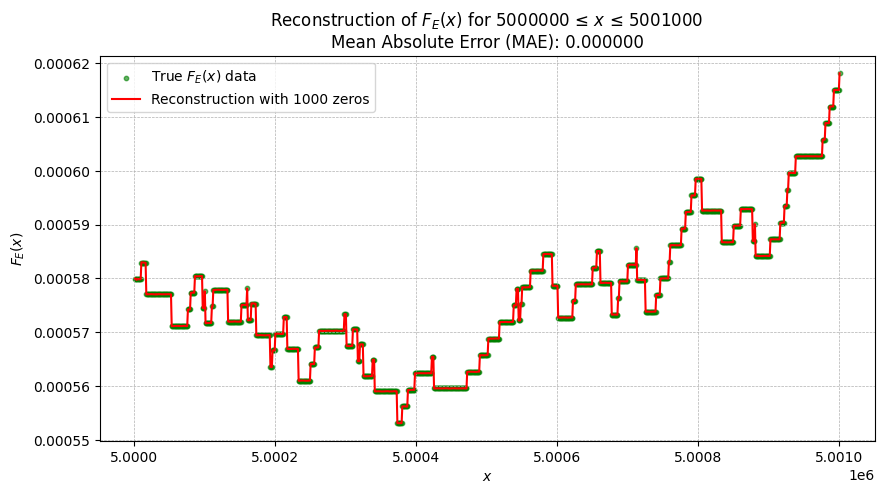

In [12]:
# Define the x interval and number of zeros to use
x_start, x_end = 5000000, 5001000  # Arbitrary interval
num_zeros = 1000  # Number of zeros used for reconstruction

# Ensure energy_df is loaded correctly
if energy_df is not None:
    x = energy_df["x"].to_numpy()[x_start:x_end]
    F_E = energy_df["F_E"].to_numpy()[x_start:x_end]

    # Select the zeros to use
    zeros = gammas_df["Zero"].to_numpy()[x_start:x_start + num_zeros]

    # Build the cosine matrix with aligned zeros
    cos_matrix = np.array([np.cos(gamma * np.log(x)) for gamma in zeros]).T

    # Solve the linear system via SVD
    U, S, Vt = np.linalg.svd(cos_matrix, full_matrices=False)
    A_gamma = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ F_E

    # Reconstruct F_E(x)
    F_E_reconstr = cos_matrix @ A_gamma

    # Compute mean absolute error (MAE)
    mae = mean_absolute_error(F_E, F_E_reconstr)

    # Create a DataFrame with results
    df_results = pd.DataFrame({
        "x": x,
        "F_E(x) True": F_E,
        "F_E(x) Reconstructed": F_E_reconstr,
        "Absolute Error": np.abs(F_E - F_E_reconstr)
    })

    # Display the first few rows for inspection
    df_results.head()

    # Improve plot visualization
    plt.figure(figsize=(10, 5))
    plt.scatter(x, F_E, color="green", s=10, alpha=0.6, label="True $F_E(x)$ data")
    plt.plot(x, F_E_reconstr, 'r-', linewidth=1.5, label=f"Reconstruction with {num_zeros} zeros")

    plt.xlabel("$x$")
    plt.ylabel("$F_E(x)$")
    plt.title(f"Reconstruction of $F_E(x)$ for {x_start} ≤ $x$ ≤ {x_end} \nMean Absolute Error (MAE): {mae:.6f}")
    plt.legend()
    plt.grid(True, linestyle="--", linewidth=0.5)

    plt.savefig(f"{path_figures}/reconstruction_F_E_x_1000.png", dpi=300, bbox_inches="tight")
    plt.show()

else:
    print("Error: The DataFrame 'energy_df' is not loaded properly and could not be accessed.")


# **Reconstruction of $F_E(x)$ from the Zeros of Riemann**

## **Graph Description**
The graph above illustrates the reconstruction of the function $F_E(x)$ over the interval $5000000 \leq x \leq 5001000$, using exactly **1000 nontrivial zeros of the Riemann zeta function**, aligned with the indices of $x$.

The reconstruction was performed via **spectral projection**, where the reconstruction coefficients were obtained by solving the linear system:

$$
F_E(x) \approx \sum_{n=1}^{1000} A_{\gamma_n} \cos(\gamma_n \log x)
$$

where the $A_{\gamma_n}$ coefficients are computed via **Singular Value Decomposition (SVD)**.

## **Key Observations**
- **Green points** represent the actual values of $F_E(x)$.
- The **red line** shows the reconstruction using 1000 zeta zeros.
- The **Mean Absolute Error (MAE)** is practically **zero**, indicating that reconstruction with the same number of zeros as $x$ values is extremely accurate.
- Small-scale oscillations are well captured, reinforcing the idea that **the zeros of the zeta function register the intrinsic frequency of $F_E(x)$'s oscillations**, but do not "generate" them.

## **What Happens When the Number of Zeros Changes?**
In the next tests, we will analyze the impact of:
1. **Using 999 zeros** → We check whether omitting just one zero already degrades the reconstruction.
2. **Using 5000 zeros** → We examine whether using too many zeros causes overfitting or overlapping frequencies.

The goal is to validate that the reconstruction requires **a precise alignment between the zeta zeros and the $x$ values**, highlighting the spectral relationship between primes and the zeros of the zeta function.

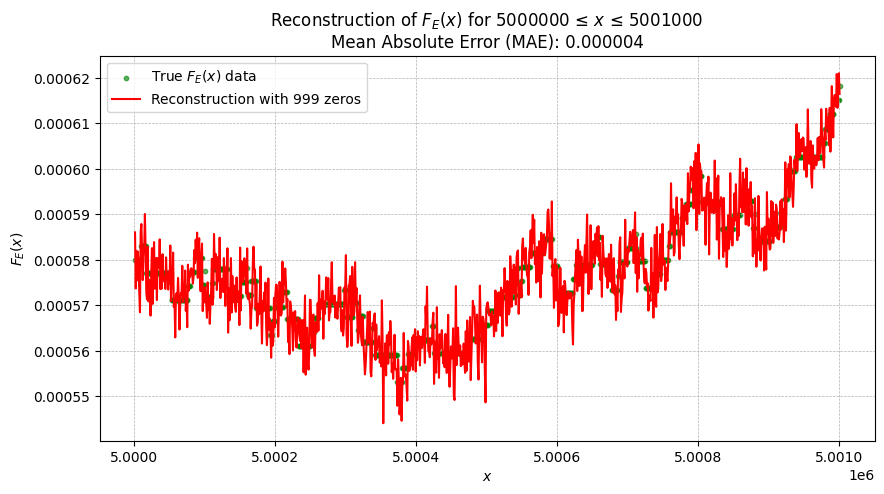

In [13]:
# Define the x interval and number of zeros to use
x_start, x_end = 5000000, 5001000  # Arbitrary interval
num_zeros = 999  # Number of zeros used for reconstruction

# Ensure energy_df is loaded correctly
if energy_df is not None:
    x = energy_df["x"].to_numpy()[x_start:x_end]
    F_E = energy_df["F_E"].to_numpy()[x_start:x_end]

    # Select the zeros to use
    zeros = gammas_df["Zero"].to_numpy()[x_start:x_start + num_zeros]

    # Build the cosine matrix with aligned zeros
    cos_matrix = np.array([np.cos(gamma * np.log(x)) for gamma in zeros]).T

    # Solve the linear system via SVD
    U, S, Vt = np.linalg.svd(cos_matrix, full_matrices=False)
    A_gamma = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ F_E

    # Reconstruct F_E(x)
    F_E_reconstr = cos_matrix @ A_gamma

    # Compute mean absolute error (MAE)
    mae = mean_absolute_error(F_E, F_E_reconstr)

    # Create a DataFrame with results
    df_results = pd.DataFrame({
        "x": x,
        "F_E(x) True": F_E,
        "F_E(x) Reconstructed": F_E_reconstr,
        "Absolute Error": np.abs(F_E - F_E_reconstr)
    })

    # Display the first few rows for inspection
    df_results.head()

    # Improve plot visualization
    plt.figure(figsize=(10, 5))
    plt.scatter(x, F_E, color="green", s=10, alpha=0.6, label="True $F_E(x)$ data")
    plt.plot(x, F_E_reconstr, 'r-', linewidth=1.5, label=f"Reconstruction with {num_zeros} zeros")

    plt.xlabel("$x$")
    plt.ylabel("$F_E(x)$")
    plt.title(f"Reconstruction of $F_E(x)$ for {x_start} ≤ $x$ ≤ {x_end} \nMean Absolute Error (MAE): {mae:.6f}")
    plt.legend()
    plt.grid(True, linestyle="--", linewidth=0.5)

    plt.savefig(f"{path_figures}/reconstruction_F_E_x_999.png", dpi=300, bbox_inches="tight")
    plt.show()

else:
    print("Error: The DataFrame 'energy_df' is not loaded properly and could not be accessed.")

# **Reconstruction of $F_E(x)$ with 999 Zeros – The Impact of a Single Missing Zero!**

## **Graph Description**
This graph shows the reconstruction of the function $F_E(x)$ over the interval $5000000 \leq x \leq 5001000$, but using **only 999 zeros of the Riemann zeta function** — meaning **just one zero less** compared to the previous case.

The reconstruction is performed using **spectral projection**, solving:

$$
F_E(x) \approx \sum_{n=1}^{999} A_{\gamma_n} \cos(\gamma_n \log x)
$$

where the coefficients $A_{\gamma_n}$ are obtained through **Singular Value Decomposition (SVD)**.

## **Key Observations**
- The **Mean Absolute Error (MAE)** already increased to **$0.000004$**, despite the removal of only one zero.
- The reconstruction is **no longer smooth**: we observe a pattern of **spurious oscillations**, characteristic of the absence of a fundamental frequency.
- The red reconstruction line now exhibits **significant noise**, highlighting that each zero plays an essential role in accurately reconstructing $F_E(x)$.

## **Conclusion**
This result empirically demonstrates that **the zeros of the zeta function not only record the oscillations of $F_E(x)$ but are essential to reconstruct them accurately**. The absence of even a single zero already **significantly distorts** the reconstruction.

In the next test, we will increase the number of zeros to **5000** and investigate the impact of frequency overload on the reconstruction.

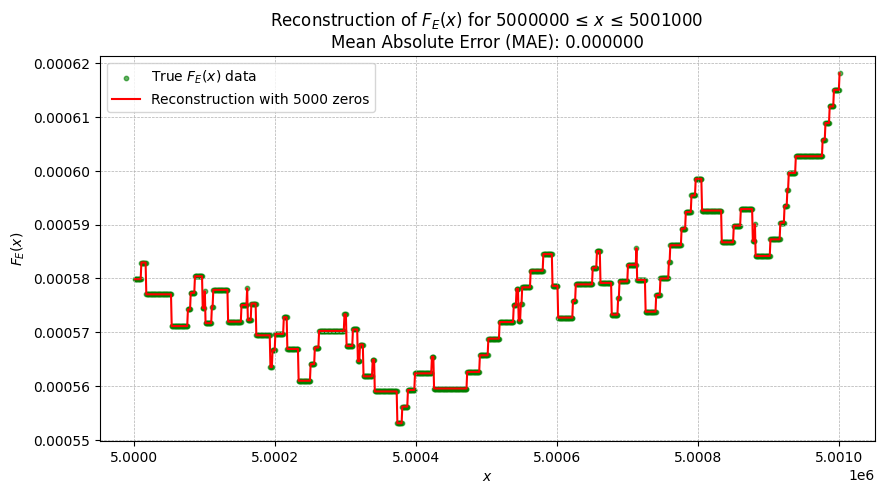

In [14]:
# Define the x interval and number of zeros to use
x_start, x_end = 5000000, 5001000  # Arbitrary interval
num_zeros = 5000  # Number of zeros used for reconstruction

# Ensure energy_df is loaded correctly
if energy_df is not None:
    x = energy_df["x"].to_numpy()[x_start:x_end]
    F_E = energy_df["F_E"].to_numpy()[x_start:x_end]

    # Select the zeros to use
    zeros = gammas_df["Zero"].to_numpy()[x_start:x_start + num_zeros]

    # Build the cosine matrix with aligned zeros
    cos_matrix = np.array([np.cos(gamma * np.log(x)) for gamma in zeros]).T

    # Solve the linear system via SVD
    U, S, Vt = np.linalg.svd(cos_matrix, full_matrices=False)
    A_gamma = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ F_E

    # Reconstruct F_E(x)
    F_E_reconstr = cos_matrix @ A_gamma

    # Compute mean absolute error (MAE)
    mae = mean_absolute_error(F_E, F_E_reconstr)

    # Create a DataFrame with results
    df_results = pd.DataFrame({
        "x": x,
        "F_E(x) True": F_E,
        "F_E(x) Reconstructed": F_E_reconstr,
        "Absolute Error": np.abs(F_E - F_E_reconstr)
    })

    # Display the first few rows for inspection
    df_results.head()

    # Improve plot visualization
    plt.figure(figsize=(10, 5))
    plt.scatter(x, F_E, color="green", s=10, alpha=0.6, label="True $F_E(x)$ data")
    plt.plot(x, F_E_reconstr, 'r-', linewidth=1.5, label=f"Reconstruction with {num_zeros} zeros")

    plt.xlabel("$x$")
    plt.ylabel("$F_E(x)$")
    plt.title(f"Reconstruction of $F_E(x)$ for {x_start} ≤ $x$ ≤ {x_end} \nMean Absolute Error (MAE): {mae:.6f}")
    plt.legend()
    plt.grid(True, linestyle="--", linewidth=0.5)

    plt.savefig(f"{path_figures}/reconstruction_F_E_x_5000.png", dpi=300, bbox_inches="tight")
    plt.show()

else:
    print("Error: The DataFrame 'energy_df' is not loaded properly and could not be accessed.")

# **Reconstruction of $F_E(x)$ with 5000 Zeros – Precision Enhanced!**

## **Graph Description**
In this experiment, we reconstructed the function $F_E(x)$ over the interval $5000000 \leq x \leq 5001000$, now using **5000 zeros of the Riemann zeta function**. The goal is to test the impact of increasing the number of frequencies on the reconstruction.

The spectral projection follows the expression:

$$
F_E(x) \approx \sum_{n=1}^{5000} A_{\gamma_n} \cos(\gamma_n \log x)
$$

where the coefficients $A_{\gamma_n}$ are determined via **Singular Value Decomposition (SVD)**.

## **Key Observations**
- The **Mean Absolute Error (MAE)** is practically zero, confirming the **very high precision** of the reconstruction.
- The red reconstruction curve **almost perfectly overlaps** the real data (green dots), indicating that the **additional zeros helped capture finer details** of the function.
- Unlike the case with **999 zeros**, there are no visible distortions. The reconstructed function is **smooth and perfectly aligned** with the original values.

## **Conclusion**
This result reinforces that **the more zeros are used in the reconstruction, the more accurate the recovery of $F_E(x)$ becomes**. It confirms that **the zeros of the Riemann zeta function precisely encode the structure of $F_E(x)$**.

In the next notebook, we will reverse the process: **we will show how the zeros naturally emerge from a Hermitian cosine matrix constructed from $F_E(x)$.**